In [1]:
import os, torch, gin
from torchinfo import summary

from pytorch_lightning import Trainer

from kymjtfs.cnn import MedleySolosClassifier, MedleyDataModule, MedleySolosDB, EfficientNet1d

gin.enter_interactive_mode()
gin.parse_config_file('/homes/cv300/Documents/scattering/scripts/gin/config.gin')

ParsedConfigFileIncludesAndImports(filename='/homes/cv300/Documents/scattering/scripts/gin/config.gin', imports=[], includes=[])

In [4]:
model = EfficientNet1d(1052, 8)
summary(model, input_size=(32, 1052, 32))
# x = torch.randn((4, 100, 32))
# model(x)

Layer (type:depth-idx)                        Output Shape              Param #
EfficientNet1d                                --                        --
├─Sequential: 1-1                             [32, 1280, 1]             --
│    └─ConvNormActivation: 2-1                [32, 32, 15]              --
│    │    └─Sequential: 3-1                   [32, 32, 15]              101,056
│    └─MBConv1: 2-2                           [32, 16, 15]              --
│    │    └─Identity: 3-2                     [32, 32, 15]              --
│    │    └─ConvNormActivation: 3-3           [32, 32, 15]              160
│    │    └─SqueezeExciteNd: 3-4              [32, 32, 15]              552
│    │    └─ConvNormActivation: 3-5           [32, 16, 15]              544
│    └─MBConv6: 2-3                           [32, 24, 8]               --
│    │    └─ConvNormActivation: 3-6           [32, 96, 15]              1,728
│    │    └─ConvNormActivation: 3-7           [32, 96, 8]               480
│    │  

In [6]:
import torchvision.models as models, torch.nn as nn
model = models.efficientnet_b0()
model.features[0][0] = nn.Conv2d(256, 
                                        32, 
                                        kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), 
                                        bias=False)
model.classifier[1] = nn.Linear(in_features=1280, out_features=8, bias=True) 
model(torch.randn(32,256,24,32))

tensor([[ 4.8808e-01, -8.0111e-01,  2.0079e-02, -9.6367e-02, -3.9430e-02,
          6.2618e-01,  2.7233e-02, -2.1751e-02],
        [-1.4511e-01, -5.5726e-02, -1.9112e-01,  2.6160e-01, -1.5609e-02,
         -1.5924e-01, -1.8816e-01,  5.2562e-02],
        [ 2.4937e-02, -3.0239e-01,  5.9080e-02, -2.0787e-02, -2.3847e-01,
          1.9752e-01, -5.4147e-01,  4.3506e-02],
        [ 2.4074e-01,  1.1020e-01, -4.5817e-02, -4.1661e-01, -3.1178e-01,
         -4.4116e-01,  1.5701e-03, -8.3302e-02],
        [ 3.3847e-02,  1.0808e-01, -1.2895e-01, -4.9534e-02, -1.4215e-01,
         -1.7795e-01,  5.4006e-02,  9.5970e-02],
        [ 1.1934e-01, -2.1561e-02,  3.6171e-01, -3.3091e-01, -1.7257e-02,
         -2.0213e-01,  1.5720e-01, -6.5996e-02],
        [ 2.6635e-01, -1.5556e+00,  1.5991e+00,  1.4037e-01,  7.6506e-01,
         -3.4953e-01,  8.9624e-01,  3.7146e-01],
        [ 1.0278e-01,  2.9357e-02,  6.6367e-02, -1.5447e-01, -2.0212e-01,
         -1.8730e-01, -9.0995e-02,  1.7080e-01],
        [ 2.4117

### Load from checkpoint

In [2]:

ckpt = '/homes/cv300/Documents/scattering/None/version_None/checkpoints/epoch=19-step=3639.ckpt'
model = MedleySolosClassifier.load_from_checkpoint(ckpt)
model.eval()
model = model.cuda()

FileNotFoundError: [Errno 2] No such file or directory: '/homes/cv300/Documents/scattering/None/version_None/checkpoints/epoch=19-step=3639.ckpt'

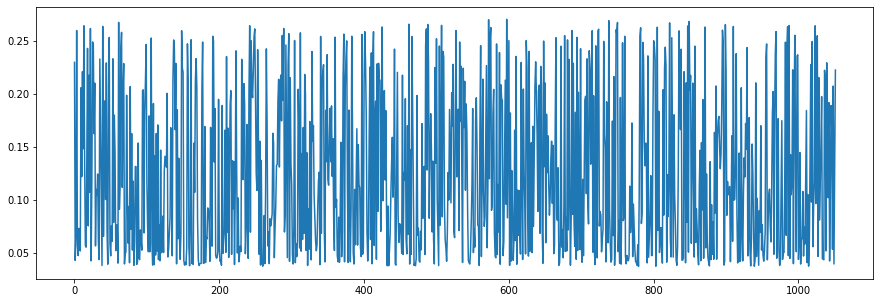

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot((model.get_c().detach().cpu().numpy()))

In [3]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader

test_loader = MedleySolosDB(subset='test')
test_ds = DataLoader(test_loader, batch_size=4, num_workers=80)

trainer = Trainer(gpus=-1, progress_bar_refresh_rate=1)
trainer.test(model, test_dataloaders=test_ds)

/homes/cv300/venvs/dafx/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:90: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=1)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/homes/cv300/venvs/dafx/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:906: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/acc': 0.0,
 'test/acc_epoch': 0.0,
 'test/loss': 2.779566764831543,
 'test/loss_epoch': 2.779566764831543}
--------------------------------------------------------------------------------


[{'test/loss': 2.779566764831543,
  'test/loss_epoch': 2.779566764831543,
  'test/acc': 0.0,
  'test/acc_epoch': 0.0}]

In [15]:
import random
from IPython.display import Audio 

last_idx = len(test_loader.df) 
idx = random.randint(0, last_idx)
item = test_loader.df.iloc[idx]
print(item['instrument_id'], item['instrument'], item['index'])

audio, y = test_loader.__getitem__(idx)
Audio(audio, rate=22050, autoplay=True)

2 female singer 2308


In [16]:
y_pred = model(audio)

In [17]:
torch.argmax(y_pred)

tensor(7, device='cuda:0')

### Histogram of magnitudes

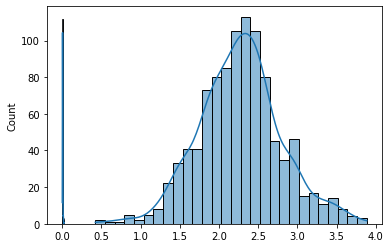

In [13]:
import os, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

jtfs_dir = '/import/c4dm-datasets/medley-solos-db/jtfs/'
train = os.path.join(jtfs_dir, 'training')
stats = os.path.join(jtfs_dir, 'stats')

mu = np.load(os.path.join(stats, 'mu.npy'))

files = [os.path.join(train, f) for f in os.listdir(train) if 'S2' in f]
s2 = np.concatenate([np.load(f) for f in files[0:1000]])
s2 = s2.mean(-1).mean(-1)

idx = 75

c = 1e-1

mu_idx = mu[idx + 1]
sns.histplot(s2[:, idx].flatten(), bins='auto', kde=True)
ax = sns.histplot(np.log1p(s2[:, idx].flatten() / (c * mu_idx)), bins='auto', kde=True)

In [22]:
import scipy.stats as st
c = 1e-1
st.skew(np.log1p(s2[:, idx].flatten() / (c * mu_idx)))

0.07478522391620246

NameError: name 'model' is not defined

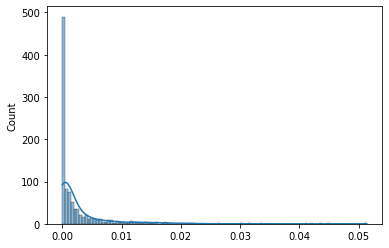

In [25]:
import os, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scat1d_dir = '/import/c4dm-datasets/medley-solos-db/scat1d/'
train = os.path.join(scat1d_dir, 'training')
stats = os.path.join(scat1d_dir, 'stats')

mu = np.load(os.path.join(stats, 'mu.npy'))

files = [os.path.join(train, f) for f in os.listdir(train)]
s2 = np.stack([np.load(f) for f in files[0:1000]])
s2 = s2.mean(axis=-1)

idx = 100

mu_idx = mu[idx + 1]
sns.histplot(s2[:, idx], bins='auto', kde=True)

c = model.get_c().detach().cpu().numpy()
ax = sns.histplot(np.log1p(s2[:, idx].flatten() / (c[idx] * mu[idx])), bins='auto', kde=True)

### Results

([<matplotlib.axis.YTick at 0x7f865827cbb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

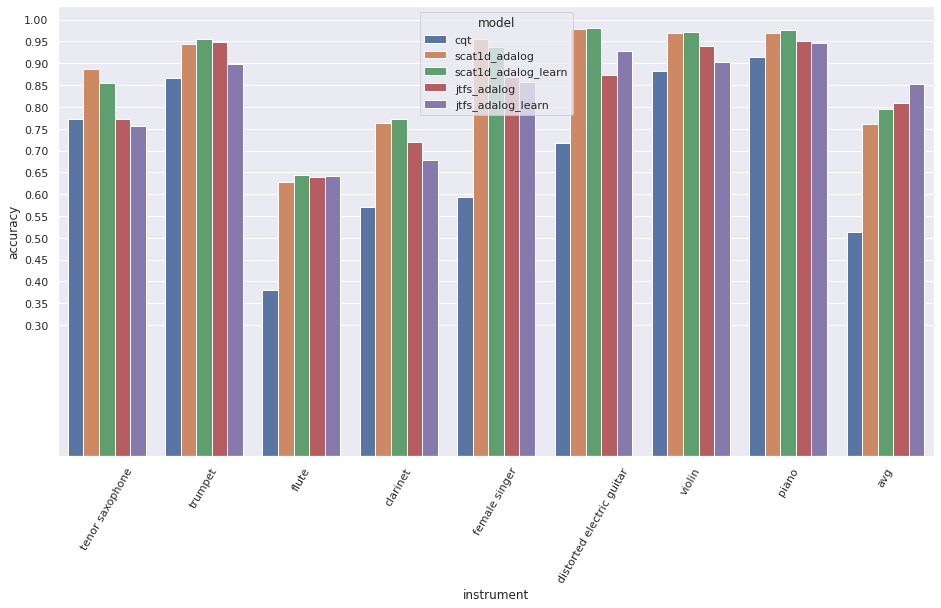

In [48]:
import seaborn as sns, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cols = ['model',
        'flute',
        'clarinet', 
        'tenor saxophone',
        'distorted electric guitar', 
        'female singer', 
        'piano', 
        'trumpet',
        'violin',
        'avg']

jtfs_adalog = ['jtfs_adalog', 0.6387, 0.7205, 0.7719, 0.8731, 0.8685, 0.9505, 0.9483, 0.9400, 0.80857]
jtfs_adalog_learn = ['jtfs_adalog_learn', 0.6410, 0.6787, 0.7554, 0.9283, 0.8568, 0.9463, 0.8984, 0.9022, 0.8536]
cqt = ['cqt', 0.3797, 0.5698, 0.7728, 0.7179, 0.5938, 0.9139, 0.8666, 0.8827, 0.5127]
scat1d_adalog = ['scat1d_adalog', 0.6273, 0.7632, 0.8871, 0.9794, 0.9558, 0.9697, 0.9445, 0.9699, 0.7601]
scat1d_adalog_learn = ['scat1d_adalog_learn', 0.6443, 0.7712, 0.8549, 0.9813, 0.9365, 0.9756, 0.9550, 0.9720, 0.7958]
df=pd.DataFrame([cqt, scat1d_adalog, scat1d_adalog_learn, jtfs_adalog, jtfs_adalog_learn],
              columns=cols).set_index('model')

meta = pd.read_csv('/import/c4dm-datasets/medley-solos-db/annotation/Medley-solos-DB_metadata.csv')
cols = list(meta[meta['subset'] == 'training']['instrument'].value_counts().index)
cols.reverse()
cols += ['avg']

sns.set(rc={'figure.figsize':(15.7,8.27)})

df2 = df[cols].stack().reset_index()
df2.columns = ['model', 'instrument','accuracy']
# g = sns.lineplot(data=df2, x='instrument', y='values', hue='model')
g = sns.barplot(data=df2, x='instrument', y='accuracy', hue='model')
plt.xticks(rotation=60)
plt.yticks(np.linspace(0.3, 1, 15))

In [30]:
df = df[['tenor saxophone', 'trumpet']]

,flute,clarinet,tenor saxophone,distorted electric guitar,female singer,piano,trumpet,violin,avg
model,,,,,,,,,
cqt,0.3797,0.5698,0.7728,0.7179,0.5938,0.9139,0.8666,0.8827,0.51270
scat1d_adalog,0.6273,0.7632,0.8871,0.9794,0.9558,0.9697,0.9445,0.9699,0.76010
scat1d_adalog_learn,0.6443,0.7712,0.8549,0.9813,0.9365,0.9756,0.9550,0.9720,0.79580
jtfs_adalog,0.6387,0.7205,0.7719,0.8731,0.8685,0.9505,0.9483,0.9400,0.80857
jtfs_adalog_learn,0.6410,0.6787,0.7554,0.9283,0.8568,0.9463,0.8984,0.9022,0.85360


In [66]:
pd.options.display.float_format = '{:.1%}'.format
df[cols].reset_index().applymap("{:.2}".format).to_latex(index=False)

/tmp/ipykernel_190566/1790917935.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df[cols].reset_index().applymap("{:.2}".format).to_latex(index=False)


'\\begin{tabular}{llllllllll}\n\\toprule\nmodel & tenor saxophone & trumpet & flute & clarinet & female singer & distorted electric guitar & violin & piano &  avg \\\\\n\\midrule\n   cq &            0.77 &    0.87 &  0.38 &     0.57 &          0.59 &                      0.72 &   0.88 &  0.91 & 0.51 \\\\\n   sc &            0.89 &    0.94 &  0.63 &     0.76 &          0.96 &                      0.98 &   0.97 &  0.97 & 0.76 \\\\\n   sc &            0.85 &    0.95 &  0.64 &     0.77 &          0.94 &                      0.98 &   0.97 &  0.98 &  0.8 \\\\\n   jt &            0.77 &    0.95 &  0.64 &     0.72 &          0.87 &                      0.87 &   0.94 &  0.95 & 0.81 \\\\\n   jt &            0.76 &     0.9 &  0.64 &     0.68 &          0.86 &                      0.93 &    0.9 &  0.95 & 0.85 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [63]:
df[cols].reset_index()

,model,tenor saxophone,trumpet,flute,clarinet,female singer,distorted electric guitar,violin,piano,avg
0,cqt,77.3%,86.7%,38.0%,57.0%,59.4%,71.8%,88.3%,91.4%,51.3%
1,scat1d_adalog,88.7%,94.5%,62.7%,76.3%,95.6%,97.9%,97.0%,97.0%,76.0%
2,scat1d_adalog_learn,85.5%,95.5%,64.4%,77.1%,93.7%,98.1%,97.2%,97.6%,79.6%
3,jtfs_adalog,77.2%,94.8%,63.9%,72.0%,86.9%,87.3%,94.0%,95.0%,80.9%
4,jtfs_adalog_learn,75.5%,89.8%,64.1%,67.9%,85.7%,92.8%,90.2%,94.6%,85.4%


In [50]:
meta['subset'].value_counts()

test          12236
training       5841
validation     3494
Name: subset, dtype: int64

### Visualize input image

In [7]:
import numpy as np, os
from kymjtfs.cnn import MedleySolosDB
import torch, torch.nn as nn, torch.nn.functional as F

data_dir = '/import/c4dm-datasets/medley-solos-db/'
loader = MedleySolosDB(data_dir, subset='training', feature='jtfs', feature_id='j8')

item_idx = 0
mu = np.load(os.path.join(data_dir, 'jtfsj8/stats/mu.npy'))
c = torch.tensor([0.1])
s1_conv1 = nn.Sequential(
    nn.Conv2d(1, 4, kernel_size=(16, 1)),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=(4, 1), padding=(2, 0))
)


(s1, s2), y = loader[item_idx]

s2.shape
# s1 = s1 / (c * mu[:1] + 1e-8)
# s2 = s2 / (c * mu[None, 1:, None, None] + 1e-8)

# s1_conv = s1_conv1(s1.unsqueeze(1))
# s1_conv = F.pad(s1_conv, 
#         (0, 0, s2.shape[-2] - s1_conv.shape[-2], 0))

# sx = torch.cat([s1_conv, s2], dim=1)[:, :, :32, :]
#             # log1p and batch norm
# sx = torch.log1p(sx)

(1, 140, 24, 32)

In [33]:
import matplotlib.pyplot as plt 

for i in range(10):
    plt.imshow(sx[0, i].detach().cpu().numpy(), cmap=plt.get_cmap('magma_r'), origin='lower')
    plt.axis('off')
    plt.savefig(f"{i}.png", bbox_inches='tight')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [13]:
import torch, torch.nn as nn, torch.nn.functional as F

s1 = torch.randn(torch.Size([32, 161, 32]))
s2 = torch.randn(torch.Size([32, 234, 39, 32]))
s1 = s1 / (c[None, :1, None] * self.mu[:1].type_as(s1) + 1e-8)
s2 = s2 / (c[None, 1:, None, None] * self.mu[None, 1:, None, None].type_as(s2) + 1e-8)
s1_conv1 = nn.Sequential(
    nn.Conv2d(1, 161, kernel_size=(16, 1)),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=(4, 1), padding=(2, 0))
)
s1_conv = s1_conv1(s1.unsqueeze(1))
s1_conv = F.pad(s1_conv, 
        (0, 0, s2.shape[-2] - s1_conv.shape[-2], 0))
# 'magma_r'